## Predict :- Monthly Rant

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('99acres_cleaned.csv')
df

,city,monthly_rant,BHKS,Baths,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,17500.0,1.0,2 Baths,470,Carpet Area,Residential,Kolshet Road,75000.0
1,mumbai,75000.0,3.0,3 Baths,1800,Super built-up Area,Residential,Sector 21 Nerul,400000.0
2,mumbai,60000.0,2.0,2 Baths,950,Super built-up Area,Residential,Wadala,200000.0
3,mumbai,52000.0,3.0,3 Baths,1300,Carpet Area,Residential,Hiranandani Estate,300000.0
4,mumbai,30000.0,1.0,1 Bath,550,Built-up Area,Residential,Kanjurmarg (East),150000.0
...,...,...,...,...,...,...,...,...,...
165416,Trivandraum,10000.0,2.0,3 Baths,1200,Built-up Area,Independent,Anayara,25000.0
165417,Trivandraum,21000.0,2.0,2 Baths,1155,Carpet Area,Residential,Kazhakkoottam,50000.0
165418,Trivandraum,10000.0,2.0,2 Baths,861,Built-up Area,Residential,Vattiyoorkkav,30000.0
165419,Trivandraum,33000.0,4.0,5 Baths,3200,Plot Area,Independent,Pattom,150000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165421 entries, 0 to 165420
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   city                      165421 non-null  object 
 1   monthly_rant              165202 non-null  float64
 2   BHKS                      164872 non-null  float64
 3   Baths                     164872 non-null  object 
 4   sqft_per_inch             165421 non-null  int64  
 5   build_up_area             165421 non-null  object 
 6   Type_of_property          165421 non-null  object 
 7   location_of_the_property  165420 non-null  object 
 8   deposit                   146964 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 11.4+ MB


## Column Baths

In [4]:
df.drop('Baths',axis=1,inplace=True)

## Column Deposite

In [5]:
df.isnull().sum()

city                            0
monthly_rant                  219
BHKS                          549
sqft_per_inch                   0
build_up_area                   0
Type_of_property                0
location_of_the_property        1
deposit                     18457
dtype: int64

In [6]:
df.build_up_area.unique()

array(['Carpet Area', 'Super built-up Area', 'Built-up Area', 'Plot Area'],
      dtype=object)

In [7]:
df.head(20)

,city,monthly_rant,BHKS,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,17500.0,1.0,470,Carpet Area,Residential,Kolshet Road,75000.0
1,mumbai,75000.0,3.0,1800,Super built-up Area,Residential,Sector 21 Nerul,400000.0
2,mumbai,60000.0,2.0,950,Super built-up Area,Residential,Wadala,200000.0
3,mumbai,52000.0,3.0,1300,Carpet Area,Residential,Hiranandani Estate,300000.0
4,mumbai,30000.0,1.0,550,Built-up Area,Residential,Kanjurmarg (East),150000.0
5,mumbai,42000.0,2.0,650,Built-up Area,Residential,Lower Parel,NaN
6,mumbai,27000.0,1.0,510,Carpet Area,Residential,Kanjurmarg (East),100000.0
7,mumbai,53000.0,2.0,1510,Super built-up Area,Residential,Pirojshanagar,300000.0
8,mumbai,175000.0,3.0,1250,Carpet Area,Residential,Bandra (East),500000.0
9,mumbai,200000.0,3.0,2000,Built-up Area,Residential,Grant Road West,800000.0


## Column Type Of Property

In [8]:
df.Type_of_property.unique()

array(['Residential', 'Independent', 'Studio', 'Serviced', 'for', 'Farm',
       'Floor'], dtype=object)

In [9]:
#df['Type_of_property'] = df['Type_of_property'].str.split("for",' ')

In [10]:
df.shape

(165421, 8)

In [11]:
# Removing for
df = df[df.Type_of_property!='for']
df.shape

(164783, 8)

In [12]:
df = df[df.Type_of_property!='Serviced']
df.shape


(164383, 8)

In [13]:
df = df[df.Type_of_property!='Floor']
df.shape

(164364, 8)

In [14]:
df.Type_of_property.unique()

array(['Residential', 'Independent', 'Studio', 'Farm'], dtype=object)

In [15]:
#pro_type = pd.get_dummies(df['Type_of_property'],drop_first=True)

In [16]:
#df = pd.merge(df,pro_type, right_index=True, left_index=True)

In [17]:
#df.drop('Type_of_property',axis=1, inplace=True)

In [18]:
df.head(2)

,city,monthly_rant,BHKS,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,17500.0,1.0,470,Carpet Area,Residential,Kolshet Road,75000.0
1,mumbai,75000.0,3.0,1800,Super built-up Area,Residential,Sector 21 Nerul,400000.0


In [19]:
df.isnull().sum()

city                            0
monthly_rant                  219
BHKS                           52
sqft_per_inch                   0
build_up_area                   0
Type_of_property                0
location_of_the_property        1
deposit                     18292
dtype: int64

In [20]:
df.dropna(inplace=True)

In [21]:
df.isnull().sum()

city                        0
monthly_rant                0
BHKS                        0
sqft_per_inch               0
build_up_area               0
Type_of_property            0
location_of_the_property    0
deposit                     0
dtype: int64

## City

In [22]:
df.city.unique()

array(['mumbai', 'pune', 'chennai', 'bangalore', 'hyderabad', 'Ahmedabad',
       'ncr', 'Trivandraum'], dtype=object)

In [23]:
#dum_city = pd.get_dummies(df.city, drop_first=True)

In [24]:
#df = pd.merge(df,dum_city, right_index=True, left_index=True)

In [25]:
#df.drop('city', axis=1, inplace=True)

In [26]:
df.head(2)

,city,monthly_rant,BHKS,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,17500.0,1.0,470,Carpet Area,Residential,Kolshet Road,75000.0
1,mumbai,75000.0,3.0,1800,Super built-up Area,Residential,Sector 21 Nerul,400000.0


## Location Of the Property

In [27]:
df.location_of_the_property.nunique()

12489

In [28]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

In [29]:
#le.fit(df['location_of_the_property'])

In [30]:
#df['location_of_the_property'] = le.transform(df['location_of_the_property'])

In [31]:
df.isna().sum()

city                        0
monthly_rant                0
BHKS                        0
sqft_per_inch               0
build_up_area               0
Type_of_property            0
location_of_the_property    0
deposit                     0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146034 entries, 0 to 165420
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   city                      146034 non-null  object 
 1   monthly_rant              146034 non-null  float64
 2   BHKS                      146034 non-null  float64
 3   sqft_per_inch             146034 non-null  int64  
 4   build_up_area             146034 non-null  object 
 5   Type_of_property          146034 non-null  object 
 6   location_of_the_property  146034 non-null  object 
 7   deposit                   146034 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.0+ MB


In [33]:
df.head(2)

,city,monthly_rant,BHKS,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,17500.0,1.0,470,Carpet Area,Residential,Kolshet Road,75000.0
1,mumbai,75000.0,3.0,1800,Super built-up Area,Residential,Sector 21 Nerul,400000.0


In [34]:
df.shape

(146034, 8)

In [35]:
#sns.scatterplot(x=df['deposit'],y=range(0,147896))

## -----------------------------------------------------------------------------------------------------------------------------

## deposit

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='deposit'>

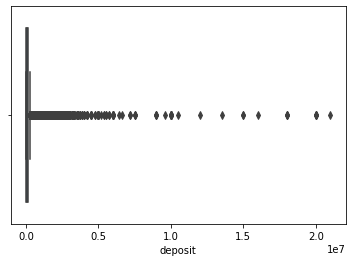

In [36]:
sns.boxplot(df['deposit'])

In [37]:
Q1 = df['deposit'].quantile(0.25)
Q3 = df['deposit'].quantile(0.75)
IQR = Q3 - Q1

In [38]:
((df['deposit'] < (Q1 - 1.5 * IQR)) | (df['deposit'] > (Q3 + 1.5 * IQR))).mean()

mask = (df['deposit'] < (Q1 - 1.5 * IQR)) | (df['deposit'] > (Q3 + 1.5 * IQR))
df[mask] = np.nan

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='deposit'>

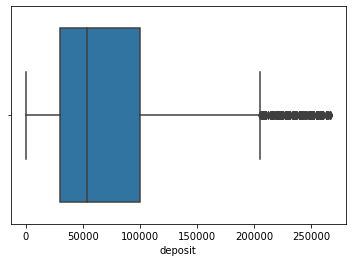

In [39]:
sns.boxplot(df['deposit'])

* We clearly observed in boxplot data is right skewed

In [40]:
#from sklearn.preprocessing import MinMaxScaler
#mms = MinMaxScaler()

In [41]:
#mms.fit(df[['deposit']])

In [42]:
#df['deposit'] = mms.transform(df[['deposit']])

In [43]:
#df.isnull().mean()

In [44]:
df.dropna(inplace=True)

<AxesSubplot:>

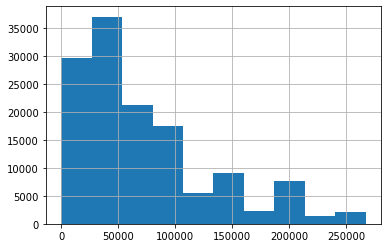

In [45]:
df['deposit'].hist()

<AxesSubplot:>

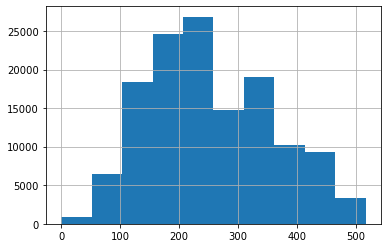

In [46]:
df['deposit']=df['deposit']**(1/2)
df['deposit'].hist()

In [47]:
df.head(2)

,city,monthly_rant,BHKS,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,17500.0,1.0,470.0,Carpet Area,Residential,Kolshet Road,273.861279
2,mumbai,60000.0,2.0,950.0,Super built-up Area,Residential,Wadala,447.213595


## sqft_per_inch

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_per_inch'>

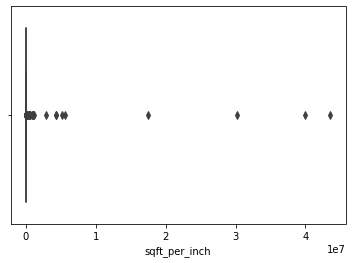

In [48]:
sns.boxplot(df.sqft_per_inch)

In [49]:
#mms_sqpi = MinMaxScaler()

In [50]:
#mms_sqpi.fit(df[['sqft_per_inch']])

In [51]:
#df['sqft_per_inch'] = mms_sqpi.transform(df[['sqft_per_inch']])

In [52]:
Q1 = df['sqft_per_inch'].quantile(0.25)
Q3 = df['sqft_per_inch'].quantile(0.75)
IQR = Q3 - Q1

In [53]:
((df['sqft_per_inch'] < (Q1 - 1.5 * IQR)) | (df['sqft_per_inch'] > (Q3 + 1.5 * IQR))).mean()

mask = (df['sqft_per_inch'] < (Q1 - 1.5 * IQR)) | (df['sqft_per_inch'] > (Q3 + 1.5 * IQR))
df[mask] = np.nan

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_per_inch'>

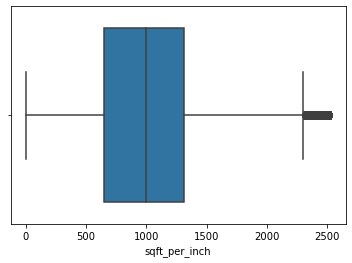

In [54]:
sns.boxplot(df.sqft_per_inch)

In [55]:
df.dropna(inplace=True)

In [56]:
df.head(2)

,city,monthly_rant,BHKS,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,17500.0,1.0,470.0,Carpet Area,Residential,Kolshet Road,273.861279
2,mumbai,60000.0,2.0,950.0,Super built-up Area,Residential,Wadala,447.213595


# ---------------------------------------------------------------------------------------------------------------

In [57]:
#df.sqft_per_inch.min(),df.sqft_per_inch.max()

In [58]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [59]:
loc_p = df.location_of_the_property.unique()

In [60]:
pd.DataFrame(loc_p)

,0
0,Kolshet Road
1,Wadala
2,Kanjurmarg (East)
3,Sector 10 Kamothe
4,Sector 18 Kamothe
5,Nerul
6,Kandivali (East)
7,Sunil Nagar
8,Vikhroli (East)
9,Sector-17 Kamothe


In [61]:
df.build_up_area.unique()

array(['Carpet Area', 'Super built-up Area', 'Built-up Area', 'Plot Area'],
      dtype=object)

# --------------------------------------------------------------------------------------------------------

In [62]:
df.shape

(128174, 8)

In [63]:
df.skew()

monthly_rant     136.285328
BHKS               2.734330
sqft_per_inch      0.647451
deposit            0.432555
dtype: float64

In [64]:
df['monthly_rant'] = np.log(df['monthly_rant']+1)

In [65]:
#df['BHKS'] = np.log(df['BHKS']+1)

In [66]:
df.BHKS.max(), df.BHKS.min()

(50.0, 1.0)

In [67]:
df.shape

(128174, 8)

In [68]:
df['city'].unique()

array(['mumbai', 'pune', 'chennai', 'bangalore', 'hyderabad', 'Ahmedabad',
       'ncr', 'Trivandraum'], dtype=object)

## ----------------------------------------------------------Modeling------------------------------------------------------------

In [69]:
#Seperating the variable Independent matrix X and dependent Vector y

X = df.drop('monthly_rant',axis=1)
y = df.monthly_rant

In [70]:
X.head(2)

,city,BHKS,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,1.0,470.0,Carpet Area,Residential,Kolshet Road,273.861279
2,mumbai,2.0,950.0,Super built-up Area,Residential,Wadala,447.213595


In [71]:
y.head(2)

0     9.770013
2    11.002117
Name: monthly_rant, dtype: float64

In [72]:
# Spliting the data into Training set & Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

# Cat Boost

In [73]:
from catboost import CatBoostRegressor
cbr = CatBoostRegressor(cat_features=['city','build_up_area','Type_of_property','location_of_the_property'],
                        learning_rate=0.1,max_depth=8)

In [74]:
cbr.fit(X_train,y_train)

0:	learn: 0.5515671	total: 319ms	remaining: 5m 18s
1:	learn: 0.5149303	total: 441ms	remaining: 3m 40s
2:	learn: 0.4827617	total: 565ms	remaining: 3m 7s
3:	learn: 0.4547315	total: 703ms	remaining: 2m 55s
4:	learn: 0.4291557	total: 822ms	remaining: 2m 43s
5:	learn: 0.4071405	total: 974ms	remaining: 2m 41s
6:	learn: 0.3874934	total: 1.11s	remaining: 2m 37s
7:	learn: 0.3706322	total: 1.24s	remaining: 2m 33s
8:	learn: 0.3554869	total: 1.38s	remaining: 2m 31s
9:	learn: 0.3418517	total: 1.49s	remaining: 2m 27s
10:	learn: 0.3301275	total: 1.63s	remaining: 2m 26s
11:	learn: 0.3194463	total: 1.76s	remaining: 2m 24s
12:	learn: 0.3111478	total: 1.89s	remaining: 2m 23s
13:	learn: 0.3034712	total: 2.04s	remaining: 2m 23s
14:	learn: 0.2947172	total: 2.14s	remaining: 2m 20s
15:	learn: 0.2871275	total: 2.24s	remaining: 2m 17s
16:	learn: 0.2810253	total: 2.35s	remaining: 2m 16s
17:	learn: 0.2756978	total: 2.47s	remaining: 2m 14s
18:	learn: 0.2711123	total: 2.58s	remaining: 2m 13s
19:	learn: 0.2669320	to

158:	learn: 0.2172932	total: 17.9s	remaining: 1m 34s
159:	learn: 0.2171825	total: 18s	remaining: 1m 34s
160:	learn: 0.2170696	total: 18.1s	remaining: 1m 34s
161:	learn: 0.2170090	total: 18.3s	remaining: 1m 34s
162:	learn: 0.2168339	total: 18.3s	remaining: 1m 34s
163:	learn: 0.2166933	total: 18.4s	remaining: 1m 34s
164:	learn: 0.2165661	total: 18.5s	remaining: 1m 33s
165:	learn: 0.2165299	total: 18.6s	remaining: 1m 33s
166:	learn: 0.2163854	total: 18.8s	remaining: 1m 33s
167:	learn: 0.2162883	total: 18.9s	remaining: 1m 33s
168:	learn: 0.2161615	total: 19s	remaining: 1m 33s
169:	learn: 0.2161409	total: 19.1s	remaining: 1m 33s
170:	learn: 0.2160295	total: 19.3s	remaining: 1m 33s
171:	learn: 0.2158991	total: 19.4s	remaining: 1m 33s
172:	learn: 0.2158097	total: 19.5s	remaining: 1m 32s
173:	learn: 0.2157580	total: 19.6s	remaining: 1m 33s
174:	learn: 0.2156373	total: 19.7s	remaining: 1m 32s
175:	learn: 0.2155777	total: 19.8s	remaining: 1m 32s
176:	learn: 0.2154887	total: 19.9s	remaining: 1m 3

314:	learn: 0.2070499	total: 34.8s	remaining: 1m 15s
315:	learn: 0.2069499	total: 34.9s	remaining: 1m 15s
316:	learn: 0.2068606	total: 35s	remaining: 1m 15s
317:	learn: 0.2068345	total: 35.2s	remaining: 1m 15s
318:	learn: 0.2067988	total: 35.2s	remaining: 1m 15s
319:	learn: 0.2067934	total: 35.4s	remaining: 1m 15s
320:	learn: 0.2067120	total: 35.5s	remaining: 1m 15s
321:	learn: 0.2066745	total: 35.6s	remaining: 1m 14s
322:	learn: 0.2066451	total: 35.7s	remaining: 1m 14s
323:	learn: 0.2065989	total: 35.8s	remaining: 1m 14s
324:	learn: 0.2065597	total: 35.9s	remaining: 1m 14s
325:	learn: 0.2064982	total: 36s	remaining: 1m 14s
326:	learn: 0.2064566	total: 36.1s	remaining: 1m 14s
327:	learn: 0.2063901	total: 36.2s	remaining: 1m 14s
328:	learn: 0.2063216	total: 36.3s	remaining: 1m 14s
329:	learn: 0.2062942	total: 36.5s	remaining: 1m 14s
330:	learn: 0.2061775	total: 36.6s	remaining: 1m 13s
331:	learn: 0.2061369	total: 36.7s	remaining: 1m 13s
332:	learn: 0.2061155	total: 36.8s	remaining: 1m 1

472:	learn: 0.2003770	total: 52.8s	remaining: 58.8s
473:	learn: 0.2003617	total: 52.9s	remaining: 58.7s
474:	learn: 0.2003384	total: 53s	remaining: 58.5s
475:	learn: 0.2003303	total: 53.1s	remaining: 58.4s
476:	learn: 0.2002889	total: 53.1s	remaining: 58.3s
477:	learn: 0.2002408	total: 53.3s	remaining: 58.2s
478:	learn: 0.2001957	total: 53.4s	remaining: 58s
479:	learn: 0.2001292	total: 53.5s	remaining: 57.9s
480:	learn: 0.2001242	total: 53.6s	remaining: 57.8s
481:	learn: 0.2000884	total: 53.7s	remaining: 57.7s
482:	learn: 0.2000577	total: 53.8s	remaining: 57.6s
483:	learn: 0.2000479	total: 54s	remaining: 57.5s
484:	learn: 0.2000177	total: 54.1s	remaining: 57.4s
485:	learn: 0.1999986	total: 54.2s	remaining: 57.3s
486:	learn: 0.1998883	total: 54.3s	remaining: 57.2s
487:	learn: 0.1998882	total: 54.4s	remaining: 57s
488:	learn: 0.1998472	total: 54.5s	remaining: 56.9s
489:	learn: 0.1998183	total: 54.6s	remaining: 56.9s
490:	learn: 0.1997790	total: 54.8s	remaining: 56.8s
491:	learn: 0.199777

631:	learn: 0.1952130	total: 1m 11s	remaining: 41.4s
632:	learn: 0.1951362	total: 1m 11s	remaining: 41.3s
633:	learn: 0.1951321	total: 1m 11s	remaining: 41.2s
634:	learn: 0.1950988	total: 1m 11s	remaining: 41.1s
635:	learn: 0.1950776	total: 1m 11s	remaining: 41s
636:	learn: 0.1950652	total: 1m 11s	remaining: 40.9s
637:	learn: 0.1949989	total: 1m 11s	remaining: 40.8s
638:	learn: 0.1949678	total: 1m 11s	remaining: 40.6s
639:	learn: 0.1949344	total: 1m 12s	remaining: 40.5s
640:	learn: 0.1949219	total: 1m 12s	remaining: 40.4s
641:	learn: 0.1948937	total: 1m 12s	remaining: 40.3s
642:	learn: 0.1948789	total: 1m 12s	remaining: 40.2s
643:	learn: 0.1948406	total: 1m 12s	remaining: 40.1s
644:	learn: 0.1947799	total: 1m 12s	remaining: 40s
645:	learn: 0.1947712	total: 1m 12s	remaining: 39.9s
646:	learn: 0.1947372	total: 1m 12s	remaining: 39.8s
647:	learn: 0.1947305	total: 1m 13s	remaining: 39.7s
648:	learn: 0.1947067	total: 1m 13s	remaining: 39.5s
649:	learn: 0.1947043	total: 1m 13s	remaining: 39.

787:	learn: 0.1912245	total: 1m 29s	remaining: 24.1s
788:	learn: 0.1912189	total: 1m 29s	remaining: 24s
789:	learn: 0.1912130	total: 1m 29s	remaining: 23.8s
790:	learn: 0.1911911	total: 1m 29s	remaining: 23.7s
791:	learn: 0.1911840	total: 1m 29s	remaining: 23.6s
792:	learn: 0.1911733	total: 1m 30s	remaining: 23.5s
793:	learn: 0.1911724	total: 1m 30s	remaining: 23.4s
794:	learn: 0.1911080	total: 1m 30s	remaining: 23.3s
795:	learn: 0.1910831	total: 1m 30s	remaining: 23.2s
796:	learn: 0.1910337	total: 1m 30s	remaining: 23.1s
797:	learn: 0.1910153	total: 1m 30s	remaining: 23s
798:	learn: 0.1909998	total: 1m 30s	remaining: 22.8s
799:	learn: 0.1909788	total: 1m 30s	remaining: 22.7s
800:	learn: 0.1909503	total: 1m 31s	remaining: 22.6s
801:	learn: 0.1909409	total: 1m 31s	remaining: 22.5s
802:	learn: 0.1909312	total: 1m 31s	remaining: 22.4s
803:	learn: 0.1909145	total: 1m 31s	remaining: 22.3s
804:	learn: 0.1908872	total: 1m 31s	remaining: 22.2s
805:	learn: 0.1908531	total: 1m 31s	remaining: 22.

943:	learn: 0.1880584	total: 1m 48s	remaining: 6.44s
944:	learn: 0.1880484	total: 1m 48s	remaining: 6.33s
945:	learn: 0.1880404	total: 1m 48s	remaining: 6.21s
946:	learn: 0.1880273	total: 1m 48s	remaining: 6.09s
947:	learn: 0.1879945	total: 1m 49s	remaining: 5.98s
948:	learn: 0.1879864	total: 1m 49s	remaining: 5.87s
949:	learn: 0.1879670	total: 1m 49s	remaining: 5.75s
950:	learn: 0.1879571	total: 1m 49s	remaining: 5.64s
951:	learn: 0.1879459	total: 1m 49s	remaining: 5.52s
952:	learn: 0.1879339	total: 1m 49s	remaining: 5.41s
953:	learn: 0.1879194	total: 1m 49s	remaining: 5.29s
954:	learn: 0.1879003	total: 1m 49s	remaining: 5.18s
955:	learn: 0.1878784	total: 1m 50s	remaining: 5.06s
956:	learn: 0.1878515	total: 1m 50s	remaining: 4.95s
957:	learn: 0.1878413	total: 1m 50s	remaining: 4.83s
958:	learn: 0.1878107	total: 1m 50s	remaining: 4.72s
959:	learn: 0.1878046	total: 1m 50s	remaining: 4.6s
960:	learn: 0.1877770	total: 1m 50s	remaining: 4.49s
961:	learn: 0.1877551	total: 1m 50s	remaining: 

In [75]:
y_pred_cbr_train = cbr.predict(X_train)
y_pred_cbr = cbr.predict(X_test)

from sklearn.metrics import r2_score

print('Xtream Gradirnt Boost Train r2_score',r2_score(y_train, y_pred_cbr_train))
print('Xtream Gradirnt Boost Test r2_score',r2_score(y_test, y_pred_cbr))

Xtream Gradirnt Boost Train r2_score 0.9024685342820975
Xtream Gradirnt Boost Test r2_score 0.8718202516600122


## Save Model

In [76]:
import pickle

In [77]:
# Saving the model
pickle.dump(cbr, open('cat_tune_model.pkl','wb'))

In [78]:
#model = pickle.load(open('cat_model.pkl','rb'))
#print(model.predict([[2, 6, 2800, 2, 2, 4, 60000]]))

# -------------------------------------------------------------------------------------------------------------

In [79]:
X_train.head(2)

,city,BHKS,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
45863,pune,2.0,925.0,Super built-up Area,Residential,Thergaon,200.000000
115663,Ahmedabad,2.0,1400.0,Plot Area,Independent,Thaltej,137.840488


In [80]:
Xtrain.unique()

NameError: name 'Xtrain' is not defined